<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/ANN_%20better_resolution/Fig_05_BIG_Segmentation_ann_new_maio_21_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
from google.colab import files

In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4]  #  numbers 4, 13 and 25 (change to the correct one: this is wrong to PSD)
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
# from segment_filter_not_conclude import Segmenta  # got image provided segmented
from segment_filter_not_conclude_parte_03 import Segmenta  

In [9]:
c =30 # size to segment
d = 150  # size to segment

In [10]:
df=Segmenta(img,c,d)
df = df.dropna()

In [11]:
print(df)

    Width           0           1  ...        9997        9998        9999
0      55  189.000000  189.000000  ...  161.000000  160.181824  160.000000
1      33  186.000000  186.000000  ...  157.000000  157.000000  157.000000
2      30  153.000000  153.000000  ...  154.000000  154.000000  154.000000
3      90  171.000000  172.777786  ...  161.000000  161.000000  161.000000
4      45   94.000000   94.000000  ...  178.000000  171.000000  171.000000
5     146  107.215805  111.828674  ...  138.277527  137.253326  137.054794
6      57    1.000000    1.000000  ...    2.000000    2.000000    2.000000
7      77    1.000000    0.298701  ...   55.402596   55.298702   56.000000
8      41  108.000000  108.000000  ...  147.439026  148.000000  148.000000
9      41   39.000000   39.000000  ...   25.560976   25.000000   25.000000
10     56    4.000000    3.571429  ...    2.000000    2.000000    2.000000
11    131  146.363831  144.473282  ...  150.473297  148.834564  147.056000
12     35  138.000000  13

In [12]:

Arq = "output_01.xlsx" # change the name in each new file
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
'''
cont = 0; num =25
img_graos = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img,c,d)
  del df['Width']
  result = np.array(df)/255
  prediction = model.predict(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)
'''

"\ncont = 0; num =25\nimg_graos = []\nimg=ww[0] \nwhile( cont < num):\n  df=Segmenta(img,c,d)\n  del df['Width']\n  result = np.array(df)/255\n  prediction = model.predict(result)\n  loc_grao =[];k=0\n  for i in prediction:\n    if( i == 0):\n      img_graos.append(df.iloc[k,:])\n      cont = cont + 1\n    k = k +1\nimg_graos = pd.DataFrame(img_graos)\nprint(img_graos)\n"

In [14]:
 num =25 #
 # File_name = 'fotos_01.xlxs' # alterar para salvar os proximos

In [15]:
k = 0; cont = 0;
img_graos = []
img = ww[0] 
while( cont < num):
  df=Segmenta(img,c,d)
  print('k=',k)
  del df['Width']
  img_graos.append(df.iloc[k,:])
  cont = cont + 1
  k = k +1
img_graos = pd.DataFrame(img_graos)
# print(img_graos)
''''''

k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24


''

In [16]:
#np.sum(np.array(img_graos.iloc[[1],:]))/(28*28)

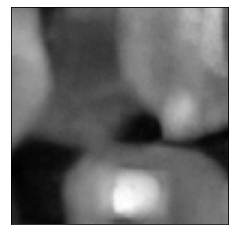

In [17]:
Size = 100
data=np.array(img_graos.iloc[[2],:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(Size,Size)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(Foto, cmap = "gray")

In [18]:
img_graos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,115.467201,117.956100,116.212372,118.350891,118.364334,119.584106,125.226761,126.763756,129.548126,136.576645,139.580063,138.671539,139.941605,138.460861,135.875916,135.786087,137.429260,138.233582,139.413345,137.157593,137.437958,137.607391,137.257126,136.511429,139.642334,141.870468,143.520157,148.487610,150.866531,150.674515,146.878143,141.829834,137.413452,128.496414,114.649841,95.522552,85.874535,76.736267,71.343063,66.808670,...,76.729927,76.359314,75.633171,75.218979,76.065536,74.895523,76.267624,78.219246,80.551605,82.949493,85.875221,86.287811,87.676910,89.284676,91.129517,93.425217,93.087593,93.899460,92.372269,93.437958,92.775154,90.328461,93.410034,92.048744,92.760246,92.108421,93.870422,92.650543,91.710213,91.029411,90.361130,90.093025,89.765358,89.496834,88.094940,91.634399,90.022964,87.321701,88.211472,90.992645
1,42.000000,42.000000,42.000000,42.000000,42.000000,40.810810,40.000000,40.000000,40.000000,40.000000,40.378380,42.000000,42.000000,41.513512,41.000000,41.000000,40.216217,40.000000,39.918919,39.000000,39.000000,39.378380,40.000000,40.000000,41.351353,42.000000,42.000000,42.972973,43.000000,44.351353,48.000000,48.000000,49.702705,51.000000,51.000000,53.594597,54.000000,54.486485,57.000000,57.000000,...,33.000000,33.000000,32.162163,32.000000,31.864864,31.000000,31.000000,31.864864,33.000000,33.000000,33.729729,34.000000,34.000000,34.000000,34.000000,34.324326,35.000000,35.000000,35.621620,36.000000,36.000000,38.756756,39.000000,39.216217,40.000000,40.000000,40.513512,41.000000,41.000000,41.810810,42.000000,42.000000,42.000000,42.000000,42.405403,43.000000,43.000000,44.405407,45.000000,45.000000
2,79.816330,81.408165,82.571434,80.918373,81.510208,79.795929,79.285721,77.816330,76.469398,73.061234,65.938782,58.693878,47.081635,34.693878,29.204082,27.489798,28.244900,27.755102,27.081635,30.448980,34.469391,39.897961,41.857147,44.142860,48.510208,55.918373,59.428574,61.653065,63.734703,65.081635,64.408165,65.346939,65.551025,64.673477,64.918373,65.714287,65.816330,65.979599,64.142860,61.714291,...,68.673477,72.326530,74.163261,73.877556,73.000000,73.285713,72.306129,70.775513,71.306129,72.020409,70.428574,68.020416,67.244904,65.714287,62.775513,60.285713,61.265312,64.326538,63.346943,63.836739,66.285721,67.714287,68.551025,69.040817,70.551025,72.448982,72.775513,73.938774,75.163269,76.795921,76.816330,76.571434,77.244904,78.428574,78.795921,78.346939,76.938782,78.469398,78.142860,81.061234
3,75.000000,75.529419,75.941177,75.000000,72.647064,71.470589,75.000000,73.705879,74.058823,79.000000,75.470589,74.235298,75.000000,75.000000,75.882355,78.000000,77.176468,78.058823,80.000000,75.588234,74.588234,74.000000,69.294121,67.588242,66.000000,64.000000,61.882355,59.764706,56.000000,51.882355,48.058823,41.000000,34.529411,29.941175,25.000000,25.705883,25.764706,25.000000,24.235294,24.000000,...,54.000000,54.470589,56.000000,56.000000,56.588234,58.000000,58.000000,57.294117,56.000000,56.882351,58.235294,60.000000,58.117645,56.588234,55.000000,55.000000,56.470589,56.000000,56.000000,54.235294,52.882355,52.000000,53.294117,54.529411,57.000000,54.882355,54.000000,54.000000,56.294121,55.235291,51.000000,52.647060,53.705883,55.000000,54.117649,54.823528,56.000000,56.000000,55.058823,54.000000
4,93.000000,93.000000,91.761902,91.000000,90.761909,90.000000,90.000000,89.142853,89.000000,88.523811,88.000000,88.000000,88.000000,88.000000,89.428574,90.000000,89.333328,88.000000,88.000000,89.904762,90.000000,90.000000,90.000000,89.809525,89.000000,89.000000,89.000000,89.000000,88.571426,88.000000,88.000000,88.000000,88.000000,88.666672,89.000000,88.142860,86.000000,86.000000,86.904762,87.000000,...,110.000000,109.71428

In [19]:
np.sum(np.array(img_graos.iloc[[3],:]))/(28*28)

840.2678259051576

In [20]:
img_graos.iloc[[3],:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
3,75.0,75.529419,75.941177,75.0,72.647064,71.470589,75.0,73.705879,74.058823,79.0,75.470589,74.235298,75.0,75.0,75.882355,78.0,77.176468,78.058823,80.0,75.588234,74.588234,74.0,69.294121,67.588242,66.0,64.0,61.882355,59.764706,56.0,51.882355,48.058823,41.0,34.529411,29.941175,25.0,25.705883,25.764706,25.0,24.235294,24.0,...,54.0,54.470589,56.0,56.0,56.588234,58.0,58.0,57.294117,56.0,56.882351,58.235294,60.0,58.117645,56.588234,55.0,55.0,56.470589,56.0,56.0,54.235294,52.882355,52.0,53.294117,54.529411,57.0,54.882355,54.0,54.0,56.294121,55.235291,51.0,52.64706,53.705883,55.0,54.117649,54.823528,56.0,56.0,55.058823,54.0


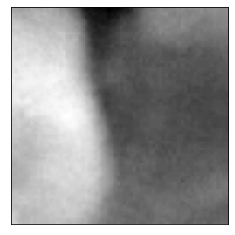

In [21]:
data=np.array(img_graos.iloc[[3],:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(Size,Size)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(Foto, cmap = "gray")

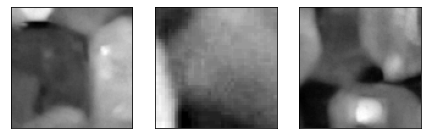

In [22]:
Num = 3
Size=100
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(img_graos.iloc[i,:]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)

  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(Size,Size)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)

In [23]:
print(np.random.rand(1,3))

[[0.2521477  0.5742904  0.90259908]]
